In [11]:
import torch
import matplotlib.pyplot as plt
from stimulus import *

In [36]:
#study parameters of interest

def transition(hf, hs, pars,input = 0):
    # size (B, V)
    a,b,c,d,e = pars['a'],pars['b'],pars['c'],pars['d'],pars['e']
    hfn = hf * (1-c) + c*torch.tanh(input  + (a + b*hf**2 - hs)*hf) #0 input response
    hsn = hs*(1-d) + d*(e*hf)**4

    return hfn, hsn 

hfs = torch.meshgrid(torch.linspace(-1.5,1.5, 100), torch.linspace(-.5,6,100), indexing = 'ij')
hfs = torch.cat((hfs[0].unsqueeze(0), hfs[1].unsqueeze(0)))

def pulse(t, begin , end):    
    return  np.heaviside(t - begin, 0) - np.heaviside(t - end, 0)


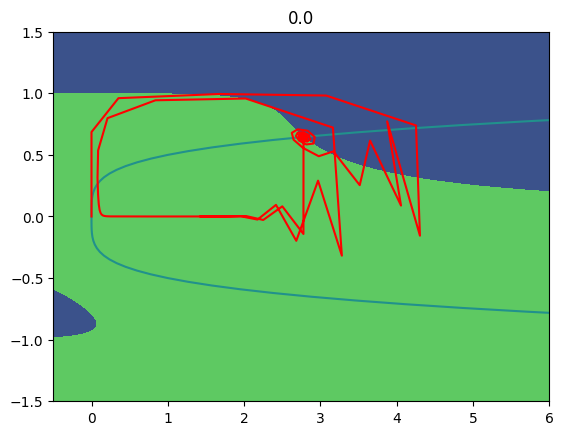

In [55]:
pars = {'a': 2, # additive slow feedback bias
        'b': 1, # multiplicative modulation bias 
        'c': 0.9, # speed of fast
        'd': 0.1, # speed of slow
        'e': 2  # impact of fast varibale on slow feedback
        }

trajectory_times_steps = 200
init_point_trajectory = [torch.tensor(0),torch.tensor(0)]

input_amplitude = 1
input_signal = pulse(np.arange(trajectory_times_steps),50,150)

for a in torch.linspace(0,3,1):
    # pars['e'] = a
    hfn, hsn = transition(hfs[0], hfs[1], pars,input_amplitude)
    plt.contourf(hfs[1], hfs[0], hfn - hfs[0], 0)
    plt.contour(hfs[1], hfs[0], hsn - hfs[1], 0)
    plt.title(f'{a}')
    trajectory = [init_point_trajectory]
    for i in range(trajectory_times_steps):
        next_fast, next_slow = transition(trajectory[-1][0], trajectory[-1][1], pars, input=input_signal[i])
        trajectory.append([next_fast,next_slow])
    trajectory = np.array(trajectory)
    plt.plot(trajectory[:,1],trajectory[:,0], label = "trajectory",color = "r")
    plt.show()